# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Azriel Rahmansyah Holy
- Batch : 19B

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# please import as much as you need

In [3]:
# read your data

df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

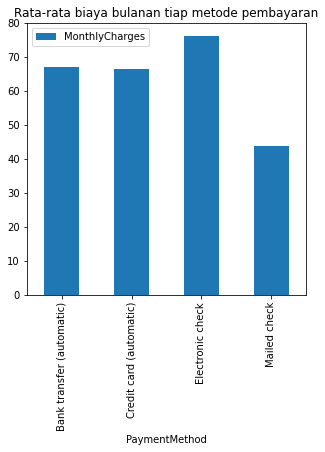

In [4]:
# your code goes here!
groupped_df = df.groupby('PaymentMethod').agg({'MonthlyCharges' : 'mean'}).plot(kind = 'bar', figsize=(5,5), title='Rata-rata biaya bulanan tiap metode pembayaran')
groupped_df;

Jadi, dari plot di atas, dapat disimpulkan bahwa...

Rata-rata biaya bulanan tertinggi ada pada metode pembayaran Electronic check </br>
Rata-rata biaya bulanan terendah ada pada metode pembayaran Mailed check </br>
Metode pembayaran Bank transfer dan Credit card memiliki nilai yang berbeda tipis

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [35]:
# Cek apa ada Duplikat pada customer
df['customerID'].duplicated().any()

False

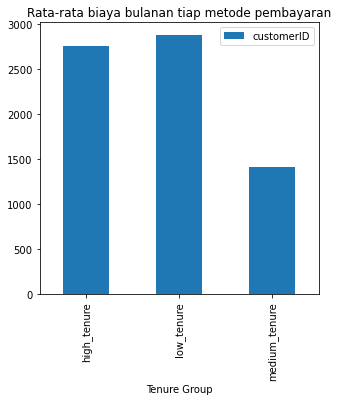

In [42]:
# your code goes here!
df['Tenure Group'] = np.where(df['tenure'] > 40, 'high_tenure', 
                                             np.where(np.logical_and(df['tenure'] >= 21, df['tenure'] <= 40), 'medium_tenure', 'low_tenure'))
kelompok = df.groupby('Tenure Group').agg({'customerID' : 'count'}).plot(kind = 'bar', figsize=(5,5), title='Rata-rata biaya bulanan tiap metode pembayaran')

Jadi, dari plot di atas, kami menyimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [5]:
senior0 = df[df['SeniorCitizen'] == 0].groupby(['SeniorCitizen','PhoneService']).agg({'customerID' : 'nunique'}).reset_index()
senior0['AllUnique'] = senior0['customerID'].sum()
senior1 = df[df['SeniorCitizen'] == 1].groupby(['SeniorCitizen','PhoneService']).agg({'customerID' : 'nunique'}).reset_index()
senior1['AllUnique'] = senior1['customerID'].sum()
senior = senior0.merge(senior1, 'outer')
senior['Percentage'] = 100 * senior['customerID'] / senior['AllUnique']
senior

,SeniorCitizen,PhoneService,customerID,AllUnique,Percentage
0,0,No,578,5901,9.79495
1,0,Yes,5323,5901,90.20505
2,1,No,104,1142,9.10683
3,1,Yes,1038,1142,90.89317


C:\Users\Azriel Rahmansyah H\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


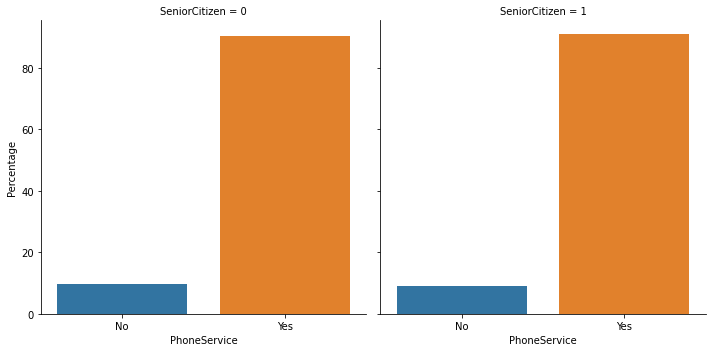

In [42]:
sns.catplot("PhoneService", "Percentage", col="SeniorCitizen", data=senior, kind="bar")

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

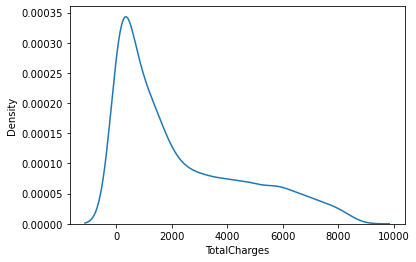

In [46]:
# your code goes here!
df = df.replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
sns.kdeplot(x='TotalCharges', data=df);

Jadi, dari plot di atas, dapat disimpulkan bahwa...

Distribusi terbesar ada pada Tagihan bulanan pada Customer dengan Range 0 - 2000, lalu setelah itu distribusi menurun tajam.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

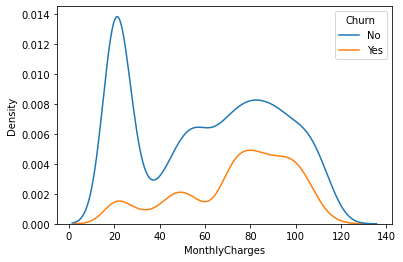

In [47]:
# your code goes here!
cenderung = sns.kdeplot(x="MonthlyCharges",hue="Churn",data=df)

Jadi, dari plot di atas, dapat disimpulkan bahwa...

Semakin mahal tagihan bulanan para customer semakin berpotensi churn, namun pada customer yang memiliki tagihan sangat tinggi hanya sedikit potensi churn dikarenakan pendapatan yang berbeda

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [40]:
df['Partner and Dependents'] = df['Partner'] + ' and ' + df['Dependents']

nochurn = df[df['Churn'] == 'No'].groupby(['Partner and Dependents','Churn']).agg({'customerID' : 'nunique'}).reset_index()
nochurn['AllUnique'] = nochurn['customerID'].sum()
yeschurn = df[df['Churn'] == 'Yes'].groupby(['Partner and Dependents','Churn']).agg({'customerID' : 'nunique'}).reset_index()
yeschurn['AllUnique'] = yeschurn['customerID'].sum()
churn = nochurn.merge(yeschurn, 'outer')
churn['Percentage'] = 100 * churn['customerID'] / churn['AllUnique']
churn

,Partner and Dependents,Churn,customerID,AllUnique,Percentage
0,No and No,No,2157,5174,41.689215
1,No and Yes,No,284,5174,5.488983
2,Yes and No,No,1233,5174,23.830692
3,Yes and Yes,No,1500,5174,28.991109
4,No and No,Yes,1123,1869,60.085607
5,No and Yes,Yes,77,1869,4.119850
6,Yes and No,Yes,420,1869,22.471910
7,Yes and Yes,Yes,249,1869,13.322632


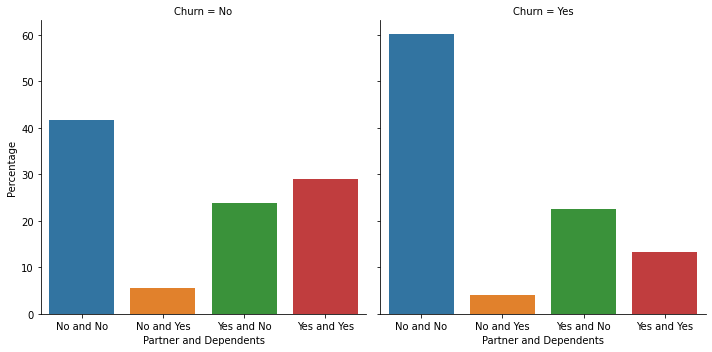

In [42]:
sns.catplot("Partner and Dependents", "Percentage", col="Churn", data=churn, kind="bar");

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [18]:
# your code goes here!
groupped = df.groupby(['PaymentMethod', 'Churn']).agg({'customerID' : 'nunique'}).reset_index()
bank = groupped[groupped['PaymentMethod'] == 'Bank transfer (automatic)']
credit = groupped[groupped['PaymentMethod'] == 'Credit card (automatic)']
echeck = groupped[groupped['PaymentMethod'] == 'Electronic check']
mcheck = groupped[groupped['PaymentMethod'] == 'Mailed check']


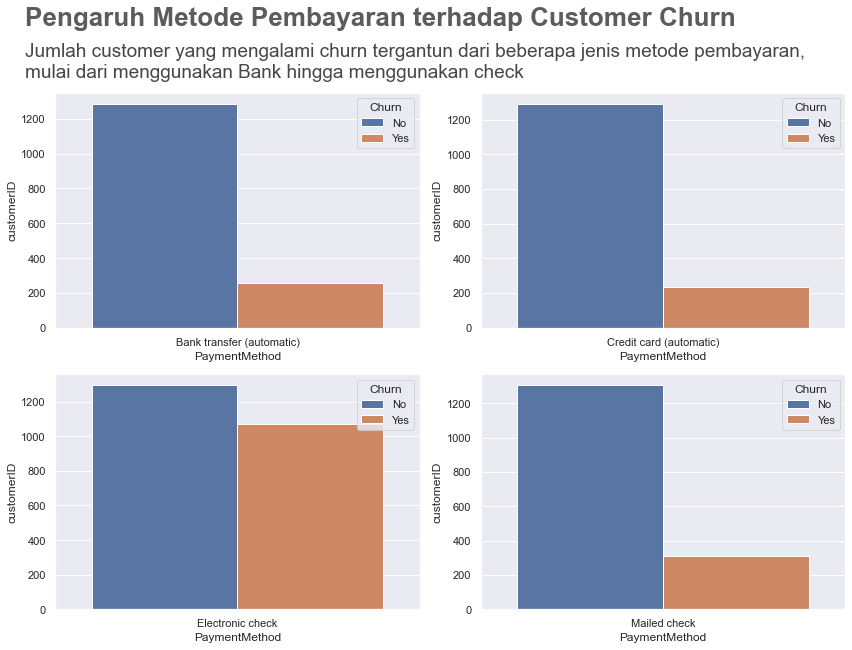

In [85]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.barplot(data=bank, x='PaymentMethod', y='customerID', hue='Churn', ax=ax[0][0])
sns.barplot(data=credit, x='PaymentMethod', y='customerID', hue='Churn', ax=ax[0][1])
sns.barplot(data=echeck, x='PaymentMethod', y='customerID', hue='Churn', ax=ax[1][0])
sns.barplot(data=mcheck, x='PaymentMethod', y='customerID', hue='Churn', ax=ax[1][1])
plt.tight_layout()

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax1.get_ylim()
plt.text(x = -1.75, y = 3400, s = "Pengaruh Metode Pembayaran terhadap Customer Churn",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -1.75, y = 3100,
               s = 'Jumlah customer yang mengalami churn tergantun dari beberapa jenis metode pembayaran, \nmulai dari menggunakan Bank hingga menggunakan check',
              fontsize = 19, alpha = .85)
plt.show()

Insight data yang didapatkan : Perbandingan churn tertipis ada pada Electronic Check. Pada metode pembayaran menggunakan bank memiliki perbandingan jauh